train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.79315, 0.7958
train acc, test acc | 0.8753, 0.8789
train acc, test acc | 0.89795, 0.9007
train acc, test acc | 0.9068, 0.9096
train acc, test acc | 0.9141166666666667, 0.9153
train acc, test acc | 0.9183333333333333, 0.9218
train acc, test acc | 0.9227833333333333, 0.9258
train acc, test acc | 0.9255666666666666, 0.928
train acc, test acc | 0.9305666666666667, 0.9324
train acc, test acc | 0.9331333333333334, 0.9348
train acc, test acc | 0.9359833333333333, 0.9372
train acc, test acc | 0.9381166666666667, 0.9378
train acc, test acc | 0.9404166666666667, 0.9412
train acc, test acc | 0.94235, 0.9418
train acc, test acc | 0.9442666666666667, 0.9435
train acc, test acc | 0.9460166666666666, 0.9448


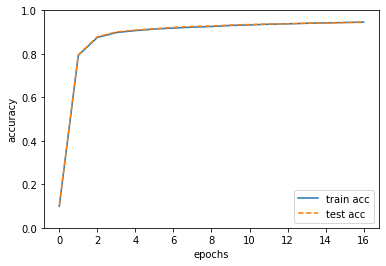

In [1]:
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt
from common.gradient import numerical_gradient
from common.functions import *
import sys
import os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        def loss_W(W): return self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(
    normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 感想
偏微分のところがよくわかりませんでした。

## 参考文献
[誤差逆伝播法をはじめからていねいに](https://qiita.com/43x2/items/50b55623c890564f1893)

[mnist-from-numpy](https://github.com/karynaur/mnist-from-numpy/blob/main/MNIST.ipynb)

[ソフトマックス関数の微分](https://qiita.com/hatahataDev/items/4f4c744a534f475ce263)

